In [3]:
import utils
from glob import glob
from pathlib import Path

In [4]:
PATH_TO_OFFPELE_TEMPLATES = '../data/plop_set/templates/offpele/*/LIG.rot.assign'
PATH_TO_PLOPROTTEMP_TEMPLATES = '../data/plop_set/templates/PlopRotTemp/*/LIG.rot.assign'

RELATIVE_PATH_TO_PDBS = '../../../pdb/'

In [5]:
offpele_mol_ids, offpele_mol_names, offpele_groups, offpele_locations, offpele_pdbs = \
    utils.extract_rotamer_info_from(PATH_TO_OFFPELE_TEMPLATES, RELATIVE_PATH_TO_PDBS)

In [6]:
plop_mol_ids, plop_mol_names, plop_groups, plop_locations, plop_pdbs = \
    utils.extract_rotamer_info_from(PATH_TO_PLOPROTTEMP_TEMPLATES, RELATIVE_PATH_TO_PDBS)

In [13]:
offpele_images = list()

for mol_id, mol_name, _groups, _locations, pdb in zip(offpele_mol_ids,
                                                      offpele_mol_names,
                                                      offpele_groups,
                                                      offpele_locations,
                                                      offpele_pdbs):
    image = utils.draw_rotamers(pdb, mol_name, _groups, _locations)
    offpele_images.append(image)

In [14]:
plop_images = list()

for mol_id, mol_name, _groups, _locations, pdb in zip(plop_mol_ids,
                                                      plop_mol_names,
                                                      plop_groups,
                                                      plop_locations,
                                                      plop_pdbs):
    image = utils.draw_rotamers(pdb, mol_name, _groups, _locations)
    plop_images.append(image)

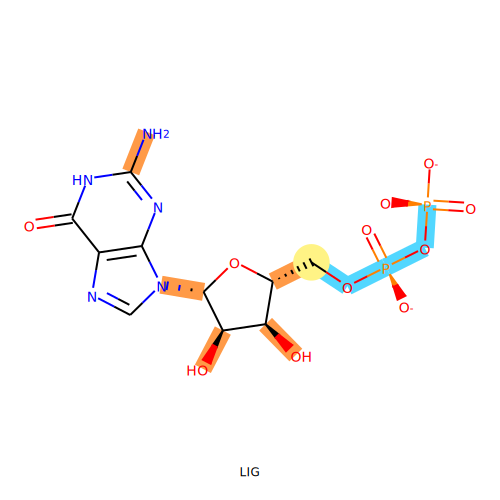

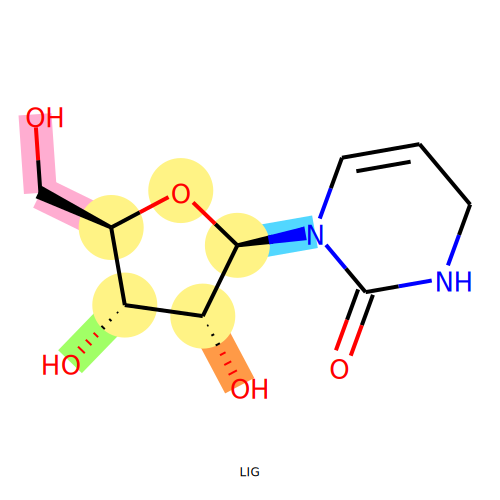

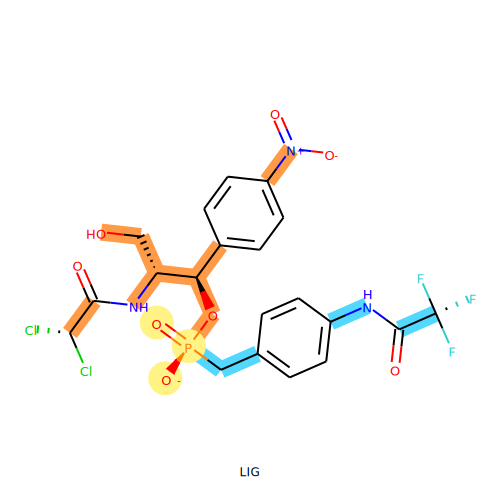

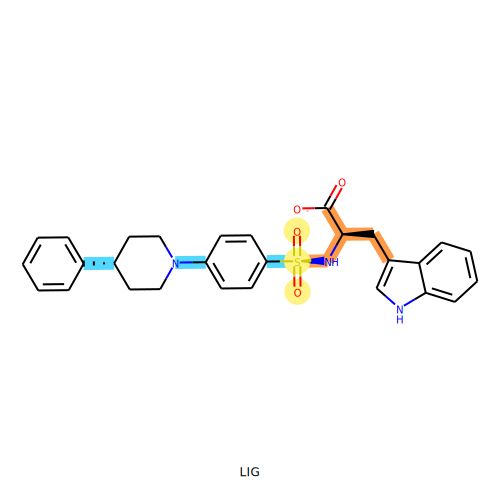

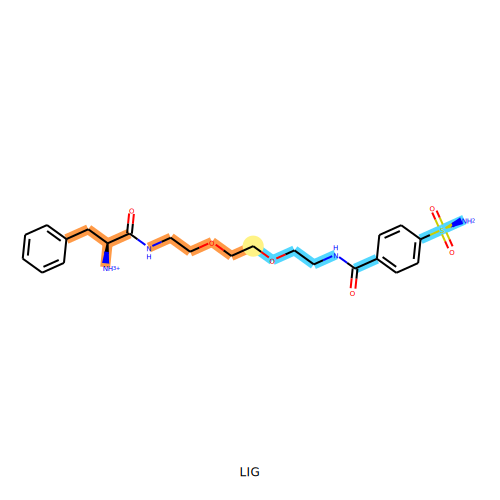

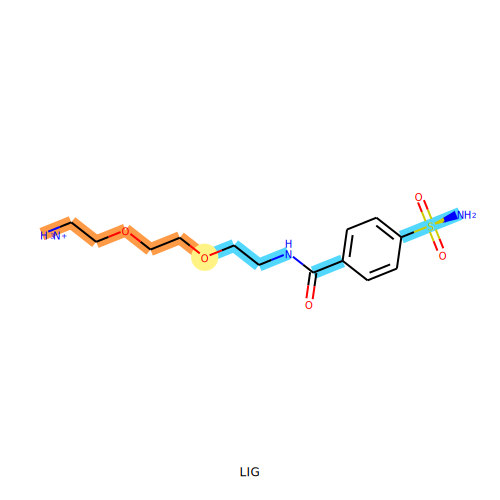

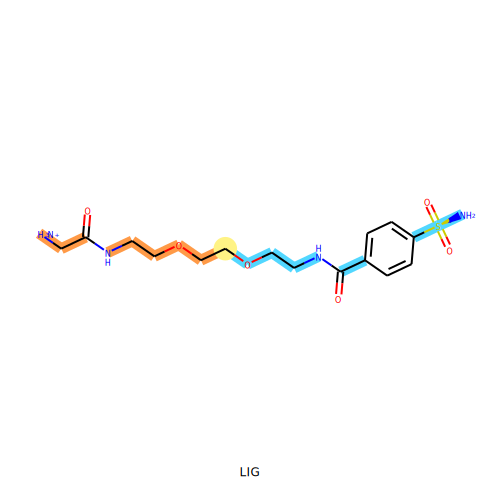

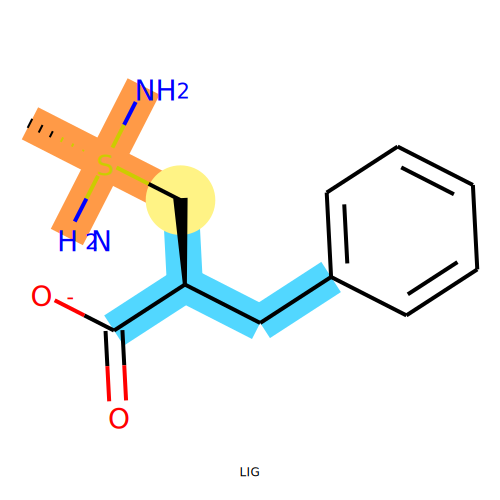

In [15]:
for image in offpele_images:
    display(image)

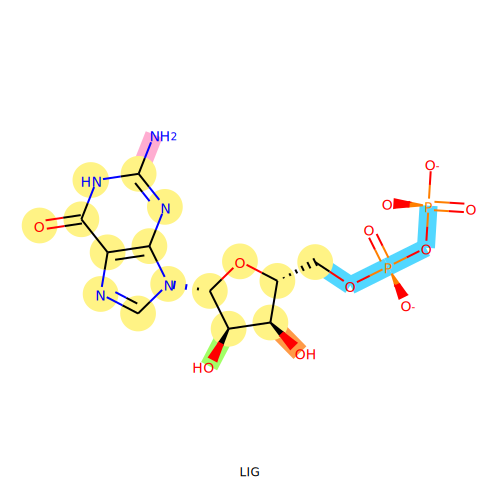

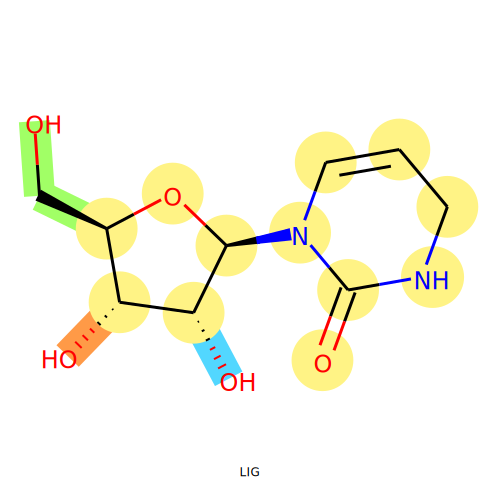

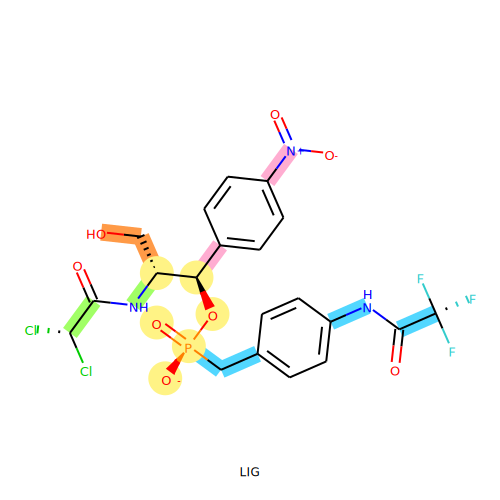

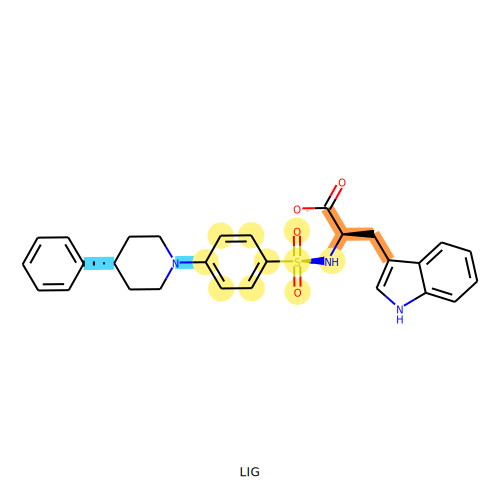

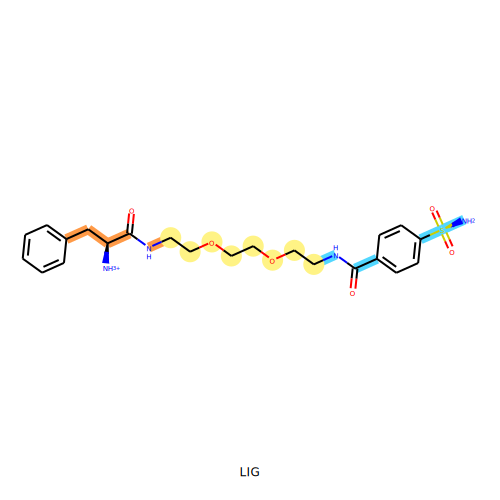

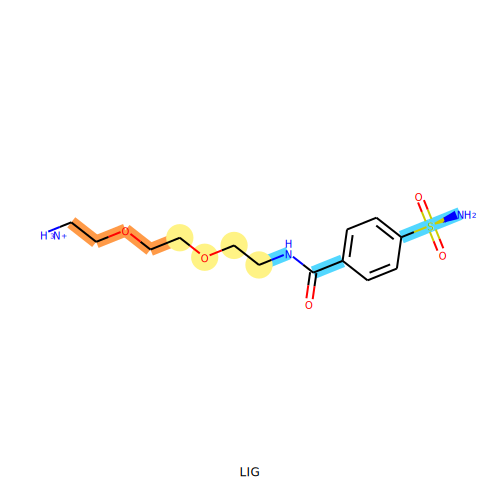

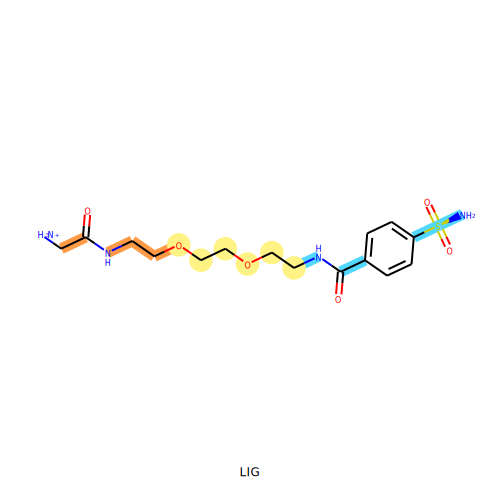

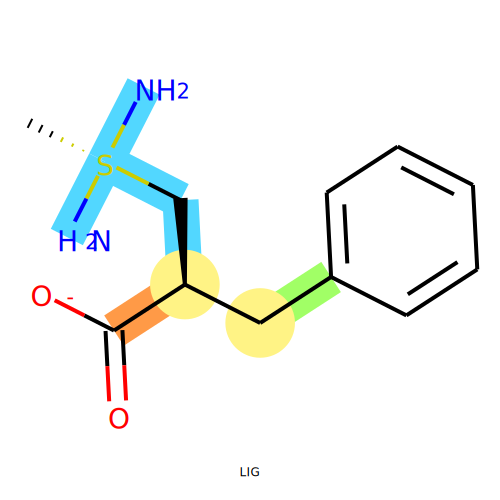

In [24]:
for image in plop_images:
    display(image)

In [8]:
dir(Chem.Draw.MolsToGridImage)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

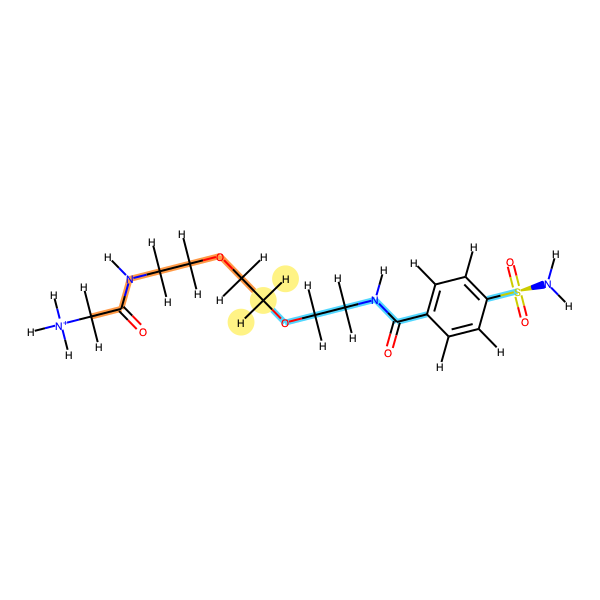

In [5]:
display(image)

In [22]:
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromPDBFile(pdbs[0], removeHs=False)
mol = Chem.RemoveHs(mol)

drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

In [24]:
from IPython.display import SVG

a = SVG(drawer.GetDrawingText())

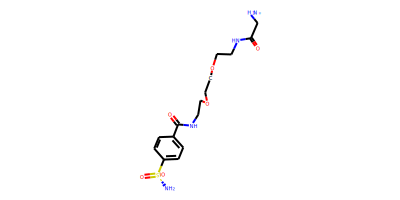

In [25]:
a

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import DrawingOptions
from IPython.display import SVG

In [9]:
DrawingOptions.atomLabelFontSize = 55
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 3.0

[3, 8, 18, 19, 21, 24, 27, 28, 31, 34, 35, 38, 41, 44]


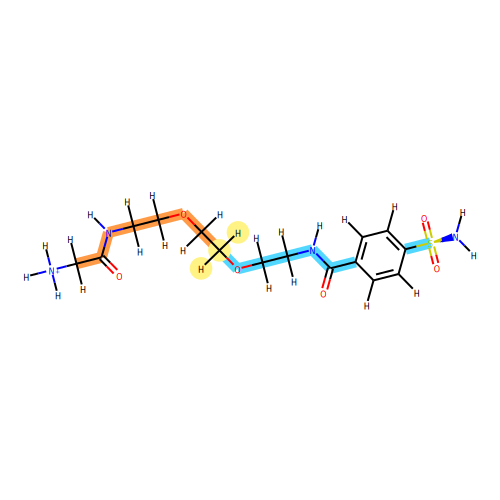

In [14]:
COLORS = [(82 / 255, 215 / 255, 255 / 255), (255 / 255, 154 / 255, 71 / 255),
          (161 / 255, 255 / 255, 102 / 255), (255 / 255, 173 / 255, 209 / 255),
          (154 / 255, 92 / 255, 255 / 255), (66 / 255, 255 / 255, 167 / 255),
          (251 / 255, 255 / 255, 17 / 255)]
    
mol = Chem.MolFromPDBFile(str(pdbs[0]), removeHs=False)

bond_indexes = list()
bond_color_dict = dict()

for bond in mol.GetBonds():
    atom1_name = bond.GetBeginAtom().GetPDBResidueInfo().GetName().replace(' ', '_')
    atom2_name = bond.GetEndAtom().GetPDBResidueInfo().GetName().replace(' ', '_')
    
    bond_id = (atom1_name, atom2_name)
    bond_id_inverse = (atom2_name, atom1_name)
    
    for color_index, group in enumerate(groups[0]):
        if bond_id in group or bond_id_inverse in group:
            bond_indexes.append(bond.GetIdx())
            bond_color_dict[bond.GetIdx()] = COLORS[color_index]
            break

atom_indexes = list()
radii_dict = dict()
atom_color_dict = dict()

for atom in mol.GetAtoms():
    atom_name = atom.GetPDBResidueInfo().GetName().replace(' ', '_')
    if locations[0][atom_name] == 'M':
        atom_indexes.append(atom.GetIdx())
        radii_dict[atom.GetIdx()] = 0.6
        atom_color_dict[atom.GetIdx()] = (255 / 255, 243 / 255, 133 / 255)
   
print(bond_indexes)
Chem.rdDepictor.Compute2DCoords(mol)
draw = rdMolDraw2D.MolDraw2DSVG(500, 500)
draw.SetLineWidth(4)
rdMolDraw2D.PrepareAndDrawMolecule(draw, mol, highlightAtoms=atom_indexes,
                                   highlightAtomRadii=radii_dict,
                                   highlightAtomColors=atom_color_dict,
                                   highlightBonds=bond_indexes,
                                   highlightBondColors=bond_color_dict)
draw.FinishDrawing()
a = Chem.Draw.MolToImage(mol)
SVG(draw.GetDrawingText())

In [16]:
type(a)

PIL.PngImagePlugin.PngImageFile

In [50]:
locations

{'_C10': 'M',
 '_C16': 'M',
 '_C17': 'M',
 '_O1_': 'S',
 '_O2_': 'S',
 '_N1_': 'S',
 '_H1_': 'S',
 '_H2_': 'S',
 '_C2_': 'S',
 '_C3_': 'S',
 '_H3_': 'S',
 '_C4_': 'S',
 '_H4_': 'S',
 '_S1_': 'S',
 '_C5_': 'S',
 '_C6_': 'S',
 '_H5_': 'S',
 '_H6_': 'S',
 '_C1_': 'S',
 '_O3_': 'S',
 '_C7_': 'S',
 '_H7_': 'S',
 '_N2_': 'S',
 '_H8_': 'S',
 '_H9_': 'S',
 '_C8_': 'S',
 '_H10': 'S',
 '_H11': 'S',
 '_C9_': 'S',
 '_O4_': 'S',
 '_C11': 'S',
 '_O5_': 'S',
 '_C18': 'S',
 '_C19': 'S',
 '_C12': 'S',
 '_C13': 'S',
 '_C20': 'S',
 '_C21': 'S',
 '_N3_': 'S',
 '_C22': 'S',
 '_C23': 'S',
 '_C14': 'S',
 '_H12': 'S',
 '_O6_': 'S',
 '_C15': 'S',
 '_N4_': 'S',
 '_C24': 'S',
 '_C25': 'S',
 '_H13': 'S',
 '_H14': 'S',
 '_H15': 'S'}

In [45]:
for bond in mol.GetBonds():
    pass

In [46]:
atom = bond.GetBeginAtom()

In [47]:
b = atom.GetPDBResidueInfo()

In [49]:
b.GetName()

' N4 '

In [19]:
a

[[('O4', 'C10'),
  ('C9', 'O4'),
  ('C8', 'C9'),
  ('N2', 'C8'),
  ('C7', 'N2'),
  ('C1', 'C7'),
  ('S1', 'C4')],
 [('C11', 'C10'),
  ('C11', 'O5'),
  ('O5', 'C12'),
  ('C12', 'C13'),
  ('C13', 'N3'),
  ('N3', 'C14'),
  ('C14', 'C15')]]

In [16]:
template_path.parent.name

'2'

In [17]:
int('a')

ValueError: invalid literal for int() with base 10: 'a'